Questão 1

Matriz de massa (M):
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Matriz de constantes elásticas (K):
[[ 2. -1.  0. ...  0.  0. -1.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [-1.  0.  0. ...  0. -1.  2.]]
Matriz dinâmica (D):
[[ 2. -1.  0. ...  0.  0. -1.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [-1.  0.  0. ...  0. -1.  2.]]
Autovalores (valores próprios):
[ 4.00000000e+00  3.96457450e+00  3.93716632e+00  3.75261336e+00
  3.90211303e+00  3.99605346e+00  3.99605346e+00  3.98422940e+00
  3.98422940e+00 -4.00011517e-15  3.85955297e+00  3.80965410e+00
  3.96457450e+00  3.93716632e+00  3.68865585e+00  3.90211303e+00
  3.85955297e+00  3.54102649e+00  3.61803399e+00  3.80965410e+00
  3.75261336e+00  3.45793

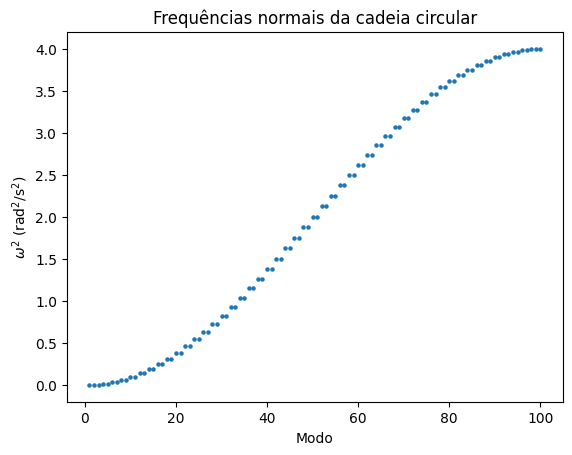

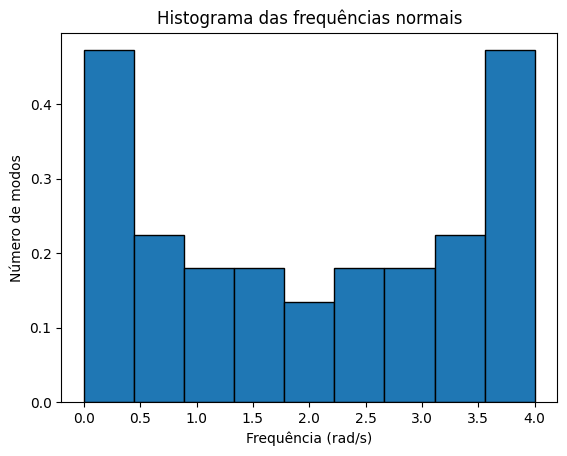

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k = 1.0 # Constante elástica (N/m)
m = 1.0 # Massa (kg)

N = int(input("Insira o número de partículas:"))

# Caso 1 - Massas homogêneas


# Matriz de massa
M = np.eye(N) * m  # Massa homogênea para todas as partículas
print("Matriz de massa (M):")
print(M)

K = np.zeros((N, N))
for i in range(N):
    K[i, i] = 2 * k
    K[i, (i-1) % N] = -k
    K[i, (i+1) % N] = -k

print("Matriz de constantes elásticas (K):")
print(K)

# Matriz dinâmica (D = M^{-1} K)
D = np.linalg.inv(M) @ K  # ou, como M = m*I, D = K/m
# Alternativamente, mais eficiente:
# D = K / m

print("Matriz dinâmica (D):")
print(D)

# Cálculo dos autovalores (valores próprios) da matriz dinâmica
autovalores, autovetores = np.linalg.eigvals(D)


print("Autovalores (valores próprios):")
print(autovalores)

print("Frequências de oscilação (rad/s):")
for i, f in enumerate(autovalores):
    print(f"Modo {i+1}: {f:.4f}")

# Opcional: plotar as frequências
plt.scatter(range(1, N+1), np.sort(autovalores.real), s=5)
plt.xlabel('Modo')
plt.ylabel(r'$\omega^2$ (rad$^2$/s$^2$)')
plt.title('Frequências normais da cadeia circular')
plt.show()

plt.hist(autovalores.real, bins=9, density=True, edgecolor='black')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Número de modos')
plt.title('Histograma das frequências normais')
plt.show()
